In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('placement-dataset.csv')

In [4]:
df.head()

,city,cgpa,iq,placement
0,New York,6.8,123.0,1
1,Los Angeles,5.9,106.0,0
2,Chicago,NaN,121.0,0
3,New York,7.4,132.0,1
4,Los Angeles,5.8,142.0,0


In [5]:
df.shape

(100, 4)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   city       100 non-null    object 
 1   cgpa       92 non-null     float64
 2   iq         96 non-null     float64
 3   placement  100 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 3.3+ KB


In [8]:
df=df.iloc[:,1:]

In [9]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,NaN,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [ ]:
df['cgpa']=df['cgpa'].fillna(df['cgpa'].mean())
df['iq']=df['iq'].fillna(df['iq'].mean())
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   cgpa       100 non-null    float64
 1   iq         100 non-null    float64
 2   placement  100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


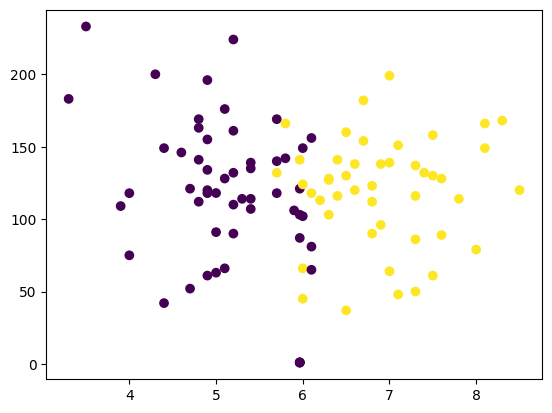

In [13]:
plt.scatter(df['cgpa'], df['iq'],c=df['placement'])

In [15]:
X = df.iloc[:,0:2]
y = df.iloc[:,2]
print(X)
print(y)

        cgpa     iq
0   6.800000  123.0
1   5.900000  106.0
2   5.965217  121.0
3   7.400000  132.0
4   5.800000  142.0
..       ...    ...
95  4.300000  200.0
96  4.400000   42.0
97  6.700000  182.0
98  6.300000  103.0
99  6.200000  113.0

[100 rows x 2 columns]
0     1
1     0
2     0
3     1
4     0
     ..
95    0
96    0
97    1
98    1
99    1
Name: placement, Length: 100, dtype: int64


In [17]:
from sklearn.model_selection import train_test_split
train_test_split(X,y,test_size=0.1)

[    cgpa     iq
 92   5.2  110.0
 57   6.5  130.0
 82   6.5   37.0
 53   8.3  168.0
 16   5.2  224.0
 ..   ...    ...
 67   5.0  118.0
 17   3.3  183.0
 75   4.8  169.0
 91   7.5  158.0
 65   8.1  166.0
 
 [90 rows x 2 columns],
         cgpa     iq
 29  5.965217    1.0
 42  7.600000   89.0
 84  5.700000  169.0
 48  6.600000  138.0
 51  4.800000  141.0
 54  6.400000  141.0
 90  7.300000   86.0
 9   5.100000   66.0
 2   5.965217  121.0
 72  7.300000  116.0,
 92    0
 57    1
 82    1
 53    1
 16    0
      ..
 67    0
 17    0
 75    0
 91    1
 65    1
 Name: placement, Length: 90, dtype: int64,
 29    0
 42    1
 84    0
 48    1
 51    0
 54    1
 90    1
 9     0
 2     0
 72    1
 Name: placement, dtype: int64]